In [2]:
import altair as alt
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('Refinery_Site_Stats.csv').drop('ID', axis=1)
data.columns = data.columns.str.replace(' ', '_')
data['run_date'] = pd.to_datetime(data['run_date'])
data['run_date'] = data['run_date'].dt.normalize()
data = data.rename(index=str, columns={"total_visualization_launches": "tot_viz_launches", "total_workflow_launches": "tot_wrkflow_launches"})

total = pd.DataFrame()
for column in data.columns:
    total[column] = data[column].cumsum() if column != "run_date" else data[column]
total.head()

,datasets_shared,datasets_uploaded,groups_created,run_date,total_user_logins,tot_viz_launches,tot_wrkflow_launches,users_created,unique_user_logins
0,151,222,22,2018-05-29,765,17,6,91,84
1,151,224,23,2018-05-30,776,19,6,115,90
2,151,224,24,2018-05-31,782,20,8,128,95
3,151,224,24,2018-06-01,783,23,8,146,96
4,151,224,24,2018-06-02,783,23,8,163,96


In [10]:
total = pd.read_csv('Refinery_Site_Stats.csv').drop('ID', axis=1).drop([0])
total.columns = data.columns.str.replace(' ', '_')
data = data.rename(index=str, columns={"total_visualization_launches": "tot_viz_launches", "total_workflow_launches": "tot_wrkflow_launches"})
total.head()

,datasets_shared,datasets_uploaded,groups_created,run_date,total_user_logins,tot_viz_launches,tot_wrkflow_launches,users_created,unique_user_logins
1,0,2,1,2018-05-30T22:35:13.946629+00:00,11,2,0,24,6
2,0,0,1,2018-05-31T22:35:14.001731+00:00,6,1,2,13,5
3,0,0,0,2018-06-01T22:35:13.946843+00:00,1,3,0,18,1
4,0,0,0,2018-06-02T22:35:13.943548+00:00,0,0,0,17,0
5,0,0,0,2018-06-03T22:35:13.945929+00:00,0,0,0,7,0


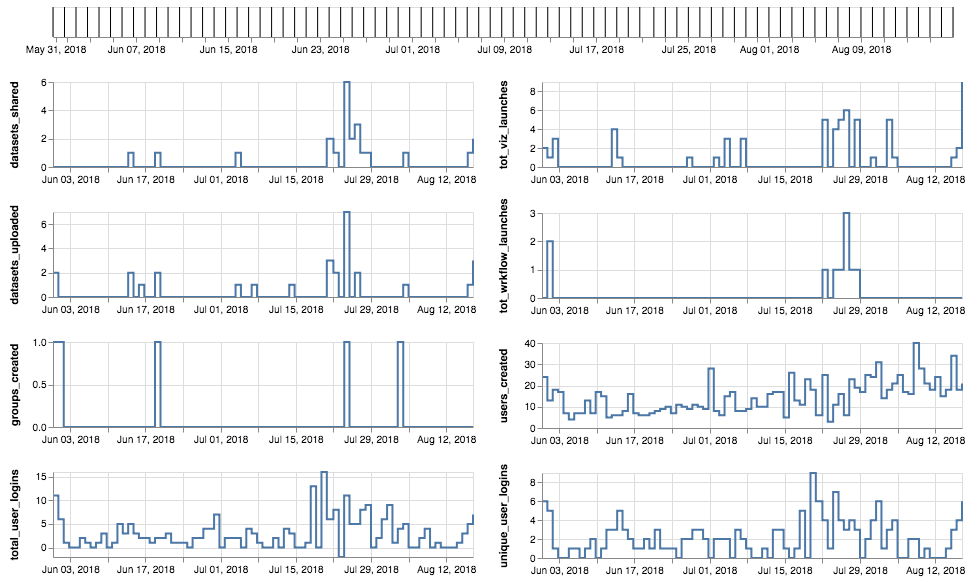

In [12]:
# filter for desired columns
columns = [col for col in total.columns.tolist() if col != 'run_date']

brush = alt.selection_interval(encodings=['x'])
nearest = alt.selection_single(nearest=True, on='mouseover', encodings=['x'], empty='none')

base = alt.Chart(total).encode(
    alt.X('run_date:T', title=None)
)

timeline = base.mark_rule().properties(
    width=900,
    height=30,
    selection=brush
)

selectors = base.mark_point().encode(
    opacity=alt.value(0),
).properties(
    selection=nearest
).transform_filter(
    brush
)

rules = base.mark_rule(color='gray').transform_filter(
    nearest
).transform_filter(
    brush
)

charts = []
for col in columns:
    line = base.mark_line(interpolate='step-before').encode(
        alt.Y(col + ':Q'),
    ).transform_filter(
        brush
    )
    
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )
    
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, col + ':Q', alt.value(' '))
    ) 
    
    chart = alt.layer(line, selectors, points, rules, text, width=420, height=85)
    charts.append(chart)

timeline & alt.hconcat(
    alt.vconcat(*charts[:4]),
    alt.vconcat(*charts[4:])
)
